In [10]:
import os
import pickle
from keras.models import load_model

In [22]:
import keras
keras.__version__

'2.4.3'

In [2]:
#load your trained pickle files here(trained  on 19k images )
pickle_in = open("/content/drive/MyDrive/Beard/training_pickle/total_training_X.pickle","rb")
tx = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Beard/training_pickle/total_training_Y.pickle","rb")
ty = pickle.load(pickle_in)


In [18]:
print(len(tx),len(ty))
tx = tx/255.0

19027 19027


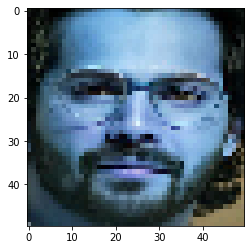

In [4]:
import matplotlib.pyplot as plt
plt.imshow(tx[12])
plt.show()

In [5]:
import numpy as np
tx = np.array(tx)
ty = np.array(ty)
print(len(tx),len(ty))

19027 19027


In [6]:

tx.shape

(19027, 50, 50, 3)

In [7]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import AveragePooling2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization,GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#load ResNet50 pre-trained model 
m1 = ResNet50(include_top=False, weights='imagenet', input_shape=tx.shape[1:])

for layer in m1.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
#fine-tuning     
model = Sequential()

model.add(m1)
model.add(GlobalMaxPooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))


model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])



model.fit(tx,ty,batch_size=32,epochs=10,validation_split=0.1,verbose=1)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/10
536/536 [==============================] - 31s 36ms/step - loss: 0.6554 - accuracy: 0.6491 - val_loss: 18.2269 - val_accuracy: 0.0158
Epoch 2/10
536/536 [==============================] - 18s 33ms/step - loss: 0.3448 - accuracy: 0.8507 - val_loss: 0.1482 - val_accuracy: 0.9637
Epoch 3/10
536/536 [==============================] - 18s 33ms/step - loss: 0.2661 - accuracy: 0.8917 - val_loss: 0.2740 - val_accuracy: 0.8902
Epoch 4/10
536/536 [==============================] - 18s 34ms/step - loss: 0.2321 - accuracy: 0.9098 - val_loss: 0.2007 - val_accuracy: 0.9264
Epoch 5/10
536/536 [==============================] - 18s 34ms/step - loss: 0.2037 - accuracy: 0.9184 - val_loss: 0.2388 - val_accuracy: 0.9075
Epoch 6/10
536/536 [==============================] - 18s 34ms/step - loss: 0.1690 - accuracy: 0.9356 - val_loss: 0.1763 - val_accuracy: 0.9417
Epoch 7/10
536/536 [==============================] - 18s 34ms/step - 

In [12]:
model=load_model("/content/drive/MyDrive/best-model-v5_retrained.h5")

In [15]:
import pickle
import numpy as np
#load your test pickle files here
pickle_in = open("/content/drive/MyDrive/test_beard_X.pickle","rb")
tex = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/test_beard_Y.pickle","rb")
tey = pickle.load(pickle_in)
print(len(tex),len(tey))


1999 1999


In [16]:
tex = np.array(tex)
tey = np.array(tey)
results = model.evaluate(tex, tey, batch_size=32)
print('test loss, test acc:', results)

63/63 [==============================] - 1s 15ms/step - loss: 0.0945 - accuracy: 0.9710
test loss, test acc: [0.09452194720506668, 0.970985472202301]


(1, 50, 50, 3)
predicted [[0.9999875]]


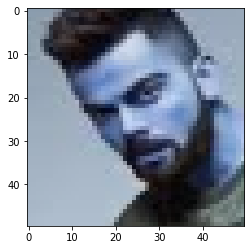

In [17]:
import matplotlib.pyplot as plt
s=[]
#20,1000,1800,1980,1975
s.append(tex[500])
s=np.array(s)
print(s.shape)
m=model.predict(s)
print('predicted',m)
plt.imshow(tex[500])
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/best-model-v5_retrained.h5")